# Load

## Tarefas:

* Padronizar os dados de todos os 4 participantes dos dados single-target e salvar de forma adequada para utilização nos próximos notebooks.
* Realizar o mesmo estudo para os dados multi-target

In [65]:


# imports

from scipy.io import loadmat
from sklearn.preprocessing import LabelEncoder
import numpy as np
import mne
import matplotlib.pyplot as plt




## Beta: 

### Carregamento

#### Fields:

![Alt text](image.png)

In [66]:
# pré-carregamento
data = loadmat(f"../../datasets/beta/S10.mat")['data'][0][0]

eeg_data = data[0]
print(eeg_data.shape)

# data structure
print('\nInformações dos dados:')
for field in ['sub', 'age', 'gender', 'chan', 'freqs', 'phases', 'bci_quotient', 'srate']:
  if field != 'chan':
    print(f'=> {field} {data[1][field][0][0].flatten().shape} : {data[1][field][0][0].flatten()}')
  else:
    channels = [data[1][field][0][0][index][3][0] for index in range(64)]
    print(f'=> {field} {len(channels)} : {channels}')

(64, 750, 4, 40)

Informações dos dados:
=> sub (1,) : ['S10']
=> age (1,) : [20.08333333]
=> gender (1,) : ['female']
=> chan 64 : ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'M1', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'M2', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2']
=> freqs (40,) : [ 8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.  11.2
 11.4 11.6 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8 14.
 14.2 14.4 14.6 14.8 15.  15.2 15.4 15.6 15.8  8.   8.2  8.4]
=> phases (40,) : [4.71238898 0.         1.57079633 3.14159265 4.71238898 0.
 1.57079633 3.14159265 4.71238898 0.         1.57079633 3.14159265
 4.71238898 0.         1.57079633 3.14159265 4.71238898 0.
 1.57079633 3.14159265 4.712

### Load Data

In [67]:
# extração direta dos dados
print("Divisão dos dados:")

eeg = eeg_data.reshape(eeg_data.shape[0], eeg_data.shape[1], eeg_data.shape[2] * eeg_data.shape[3])
labels = np.array(list(data[1]['freqs'][0][0].flatten()) * 4)
print(labels)
print(eeg.shape, labels.shape)

Divisão dos dados:
[ 8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.  11.2
 11.4 11.6 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8 14.
 14.2 14.4 14.6 14.8 15.  15.2 15.4 15.6 15.8  8.   8.2  8.4  8.6  8.8
  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.  11.2 11.4 11.6
 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8 14.  14.2 14.4
 14.6 14.8 15.  15.2 15.4 15.6 15.8  8.   8.2  8.4  8.6  8.8  9.   9.2
  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.  11.2 11.4 11.6 11.8 12.
 12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8 14.  14.2 14.4 14.6 14.8
 15.  15.2 15.4 15.6 15.8  8.   8.2  8.4  8.6  8.8  9.   9.2  9.4  9.6
  9.8 10.  10.2 10.4 10.6 10.8 11.  11.2 11.4 11.6 11.8 12.  12.2 12.4
 12.6 12.8 13.  13.2 13.4 13.6 13.8 14.  14.2 14.4 14.6 14.8 15.  15.2
 15.4 15.6 15.8  8.   8.2  8.4]
(64, 750, 160) (160,)


### Criando MNE

In [68]:
# criação de um objeto "info"
n_channels = 64
sfreq = data[1]['srate'][0][0][0][0]
ch_names = [data[1]['chan'][0][0][index][3][0] for index in range(64)]
ch_types = ['eeg'] * 64
info = mne.create_info(ch_names, sfreq=sfreq, ch_types=ch_types)
info

<Info | 7 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 250.0 Hz
>

In [69]:
data_correct = eeg.swapaxes(0, 2)
data_correct = data_correct.swapaxes(1, 2)
print(data_correct.shape)

# método para transformar labels categóricos
le = LabelEncoder()
events = np.column_stack((
    np.array(range(len(labels))),
    np.zeros(len(labels), dtype=int),
    le.fit_transform(labels))
)

event_dict = {'8.6': 3, '8.8': 4, '9.0': 5, '9.2': 6, '9.4': 7, '9.6': 8, '9.8': 9, '10.0': 10, '10.2': 11, '10.4': 12, '10.6': 13, '10.8': 14, '11.0': 15, '11.2': 16, '11.4': 17, '11.6': 18, '11.8': 19, '12.0': 20, '12.2': 21, '12.4': 22, '12.6': 23, '12.8': 24, '13.0': 25, '13.2': 26, '13.4': 27, '13.6': 28, '13.8': 29, '14.0': 30, '14.2': 31, '14.4': 32, '14.6': 33, '14.8': 34, '15.0': 35, '15.2': 36, '15.4': 37, '15.6': 38, '15.8': 39, '8.0': 0, '8.2': 1, '8.4': 2}

mne_data = mne.EpochsArray(data_correct, info, events, event_id=event_dict)
print(mne_data)

(160, 64, 750)
Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated
<EpochsArray |  160 events (all good), 0 – 2.996 s, baseline off, ~58.6 MB, data loaded,
 '8.6': 4
 '8.8': 4
 '9.0': 4
 '9.2': 4
 '9.4': 4
 '9.6': 4
 '9.8': 4
 '10.0': 4
 '10.2': 4
 '10.4': 4
 and 30 more events ...>


## Visualização

PSD do evento com label 9.8


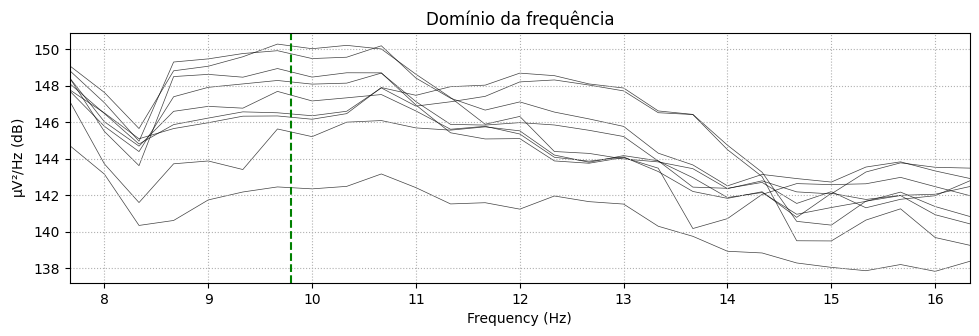

PSD do evento com label 10.6


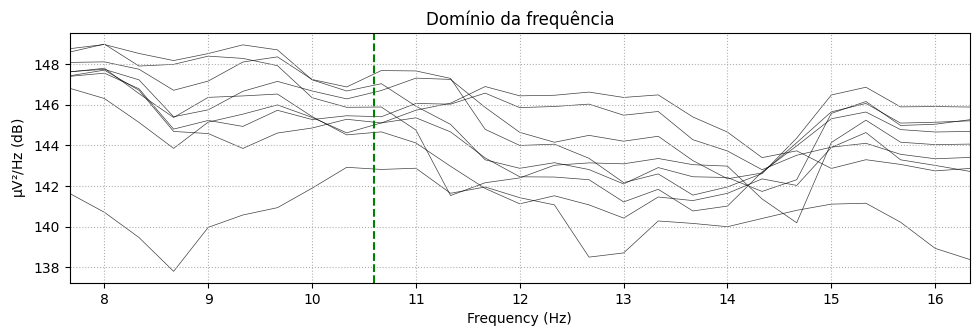

PSD do evento com label 12.600000000000001


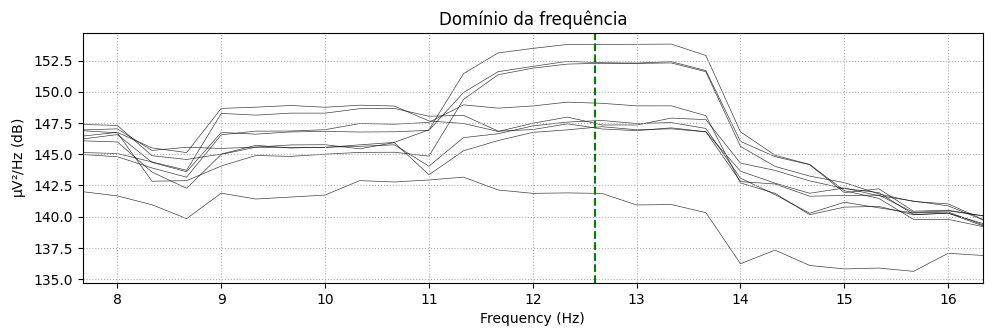

PSD do evento com label 15.600000000000001


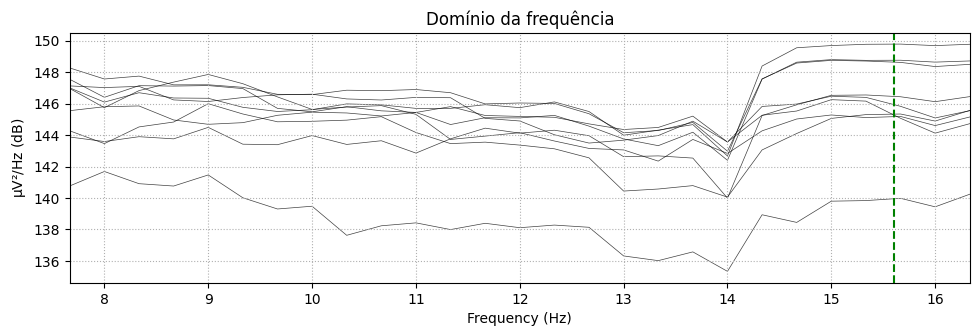

PSD do evento com label 12.600000000000001


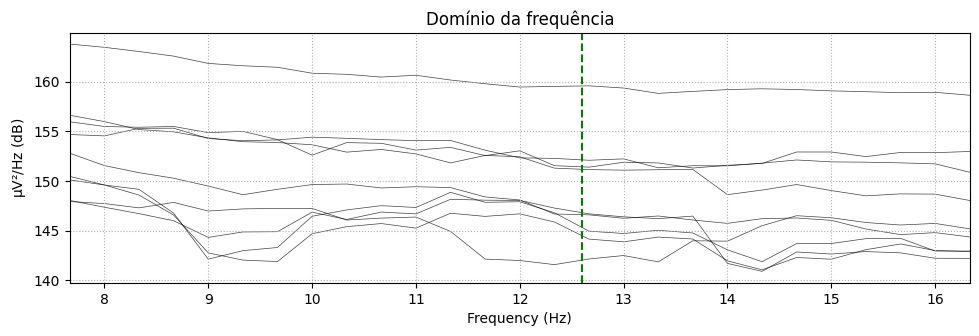

In [70]:
import warnings
warnings.filterwarnings('ignore')

mne_data_plot = mne_data
mne_data_plot = mne_data_plot.drop_channels([name for name in ch_names if name not in ['PZ', 'PO3', 'PO5', 'PO4', 'PO6', 'POZ', 'O1', 'OZ', 'O2']]) #['O1', 'OZ', 'O2']]) #

for i in [6, 10, 20, 35, 100]: #range(len(mne_data)):
    print('PSD do evento com label', labels[i])
    view = mne_data_plot[i].compute_psd(method='multitaper', fmin=7.5, fmax=16.5, verbose=False)
    view.plot(show=False)
    plt.title('Domínio da frequência')
    plt.axvline(x=float(list(mne_data_plot[i].event_id)[0]), linestyle='--', color='green')
    plt.show()

## Classificação

### Classificação por frequência mais alta.

In [71]:
threshold = 0.5
freqs = data[1]['freqs'][0][0].flatten()

y_pred = []

#para todas as instancias
for i in range(len(mne_data)):
    #psd
    item = mne_data[i].compute_psd(method='multitaper', fmin=7.5, fmax=16.5, verbose=False)
    
    #pegar media de cada faixa de frequencia
    classes = []
    for freq in freqs:        
        classes.append( item.get_data(fmin=freq-threshold, fmax=freq+threshold).mean() )
    
    #verificar qual é a maior faixa de freq
    y_pred.append( freqs[np.argmax(classes)] )
    
#calcular acuracia
acuracia = sum(y_pred == labels) / len(labels)
print('Acurácia:',acuracia)

Acurácia: 0.05


### Comparando as labels com a predição:

In [72]:
# Prova Real
accy = 0
for i in range(len(labels)):
    print(labels[i], y_pred[i])
    
    if labels[i] == y_pred[i]:
        accy += 1/len(labels)

print(accy)

8.6 8.0
8.799999999999999 8.0
9.0 8.2
9.2 8.6
9.4 12.2
9.6 9.6
9.8 10.2
10.0 8.0
10.2 10.2
10.4 8.0
10.6 8.0
10.8 11.2
11.0 8.0
11.2 8.0
11.4 8.0
11.6 8.0
11.8 12.0
12.0 11.2
12.2 12.2
12.4 12.2
12.600000000000001 12.600000000000001
12.8 13.0
13.0 12.2
13.200000000000001 12.600000000000001
13.4 13.0
13.600000000000001 12.600000000000001
13.8 13.200000000000001
14.0 8.0
14.200000000000001 8.0
14.4 13.600000000000001
14.600000000000001 15.0
14.8 14.200000000000001
15.0 14.200000000000001
15.200000000000001 8.0
15.4 15.600000000000001
15.600000000000001 15.200000000000001
15.8 15.600000000000001
8.0 8.2
8.2 8.0
8.4 11.2
8.6 8.0
8.799999999999999 8.0
9.0 8.0
9.2 8.2
9.4 9.0
9.6 9.2
9.8 9.0
10.0 8.0
10.2 9.2
10.4 10.2
10.6 10.0
10.8 11.0
11.0 10.6
11.2 11.2
11.4 11.0
11.6 11.0
11.8 12.2
12.0 11.6
12.2 12.600000000000001
12.4 12.600000000000001
12.600000000000001 12.0
12.8 8.0
13.0 13.600000000000001
13.200000000000001 12.600000000000001
13.4 13.200000000000001
13.600000000000001 13.0
13.8 1